# Análise de execução de paralelismo através de Threads em c++

## Introdução

Para a análise de tempo de execução usando palalelismo criamos um programa em C++ para fazer a leitura das obras de William Shakespeare e contar o número de ocorrências das palavras "love" e "hate", explorando o paralelismo.

## Estrutura do código

Nossa função principal chama-se 'process_threads', com a ajuda de algumas funções auxiliares ela lê o arquivo texto que é recebido como parâmetro e o processa a fim de segmentá-lo em n partes "iguais", sendo n o número de threads que desejamos utilizar. Em seguida ela gera um vetor de threads e executa um loop para adicionar no vetor cada thread com a função de contar palavras no segmento reservado a ela. Após fazer isso as threads são unidas por meio de um join. Durante todo esse processo informações de quantidade de threads, tempo de execução, quantidade de palavras encontradas e palavras mais comuns são armazenadas em uma estrutura que é retornada no final da função. 

**Código implementado:**

```cpp
#include <iostream>

int main() {
    std::cout << "Hello, world!" << std::endl;
    return 0;
}


## Análise de Execusão


Para analisar o tempo de execução dado a quantidade de threads, utilizamos um loop de 1 a 100 e armazenamos essas informações em um vetor que posteriormente foi transformado em um arquivo csv para gerar o gráfico abaixo:

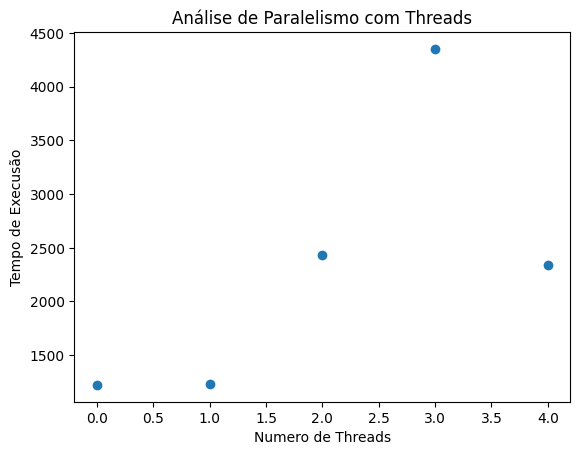

In [1]:
from view_threads import view_threads

view_threads("csv_teste.csv")

Como podemos ver, o tempo de execução sofre muita influência da quantidade de threads implementadas. Quanto mais paralelizamos e dividimos o processo, menos tempo é necessário para a execução do código. No início, essa queda é extrema devido a ineficiência do processo feito em concorrência. Conforme aumentamos o número de threads, esse tempo se estabiliza, pois alcançamos o limite de threads no hardware da máquina. A partir desse ponto, o sistema operacional passa a implementar paralelismo juntamente de concorrência, fazendo com que uma thread a mais ou a menos não afete tanto o tempo de execução.